In [86]:
import cv2
import numpy as np

from skimage.measure import label, regionprops
import matplotlib.pyplot as plt


In [87]:
# Reading multiple images
image1 = cv2.imread('./train/1-MB.jpg')  # Replace with the correct file path
image2 = cv2.imread('./train/1-ML.jpg')  # Replace with the correct file path
image3 = cv2.imread('./train/1-PL.jpg')  # Replace with the correct file path
image4 = cv2.imread('./train/1-WL.jpg')  # Replace with the correct file path

# Optional: Convert images to RGB if needed for visualization with Matplotlib
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
image4 = cv2.cvtColor(image4, cv2.COLOR_BGR2RGB)

top_Threshold=60
bottom_Threshold=165

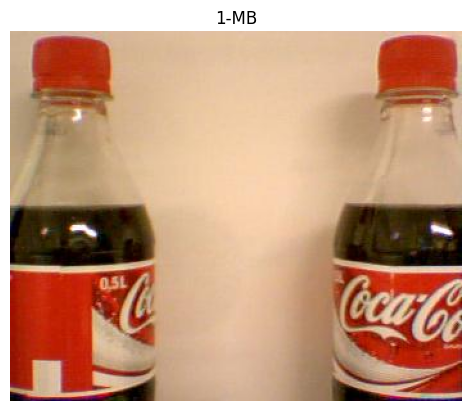

In [88]:
plt.imshow(image1)
plt.title('1-MB')
plt.axis('off')
plt.show()

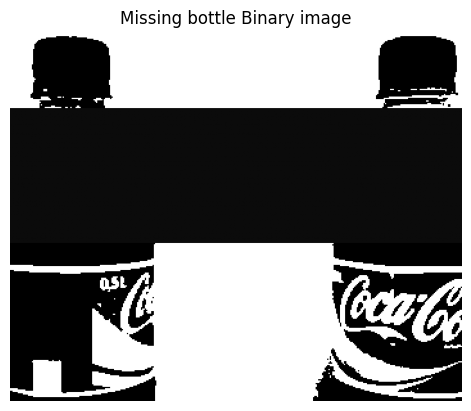

In [89]:
# Convert the second image to grayscale
image1_g = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)

# Convert the grayscale image to a binary image (thresholding)
_, image1_b = cv2.threshold(image1_g, 127, 255, cv2.THRESH_BINARY)
image1_b[top_Threshold:bottom_Threshold] = 11


# Display the binary image
plt.imshow(image1_b, cmap='gray')
plt.title('Missing bottle Binary image')
plt.axis('off')  # Hide axis for better visualization
plt.show()


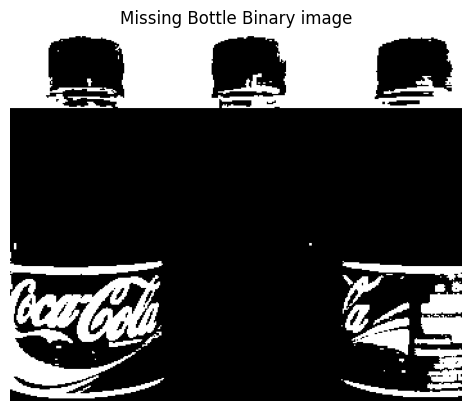

In [90]:
# Convert the second image to grayscale
image2_g = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)

# Convert the grayscale image to a binary image (thresholding)
_, image2_b = cv2.threshold(image2_g, 127, 255, cv2.THRESH_BINARY)
# I_m[:, 80:121] = 0
image2_b[top_Threshold:bottom_Threshold] = 0

# Display the binary image
plt.imshow(image2_b, cmap='gray')
plt.title('Missing Bottle Binary image')
plt.axis('off')  # Hide axis for better visualization
plt.show()

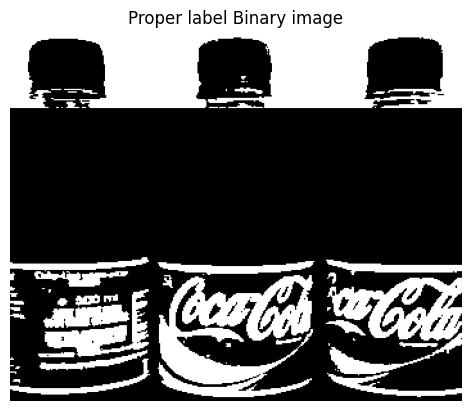

In [91]:
# Convert the third image to grayscale
image3_g = cv2.cvtColor(image3, cv2.COLOR_RGB2GRAY)

# Convert the grayscale image to a binary image (thresholding)
_, image3_b = cv2.threshold(image3_g, 127, 255, cv2.THRESH_BINARY)
image3_b[top_Threshold:bottom_Threshold] = 0


# Display the binary image
plt.imshow(image3_b, cmap='gray')
plt.title('Proper label Binary image')
plt.axis('off')  # Hide axis for better visualization
plt.show()

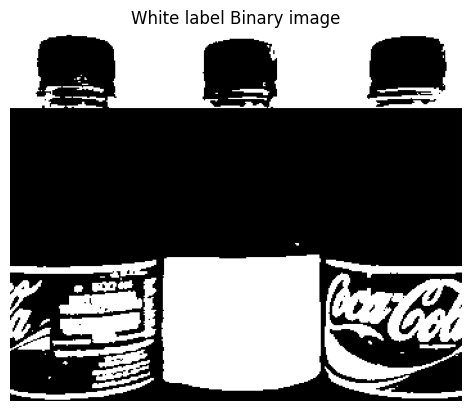

In [92]:
# Convert the fourth image to grayscale
image4_g = cv2.cvtColor(image4, cv2.COLOR_RGB2GRAY)

# Convert the grayscale image to a binary image (thresholding)
_, image4_b = cv2.threshold(image4_g, 127, 255, cv2.THRESH_BINARY)
image4_b[top_Threshold:bottom_Threshold] = 0


# Display the binary image
plt.imshow(image4_b, cmap='gray')
plt.title('White label Binary image')
plt.axis('off')  # Hide axis for better visualization
plt.show()

In [93]:
# I1 is the binary image image4_b
I1 = image1_b

# Calculate the area (number of white pixels)
Area_missing_bottle = np.sum(I1 == 255)

# Display the area
print(Area_missing_bottle)

40769


In [94]:
# I1 is the binary image image4_b
I2 = image2_b

# Calculate the area (number of white pixels)
Area_missing_label = np.sum(I2 == 255)

# Display the area
print(Area_missing_label)

23959


In [95]:
# I1 is the binary image image4_b
I3 = image3_b

# Calculate the area (number of white pixels)
Area_proper_label = np.sum(I3 == 255)

# Display the area
print(Area_proper_label)

29005


In [96]:
# I1 is the binary image image4_b
I4 = image4_b

# Calculate the area (number of white pixels)
Area_white_label = np.sum(I4 == 255)

# Display the area
print(Area_white_label)

36492


In [97]:
# Reading multiple images

def model(image_path):

  # image_test = cv2.imread('/content/drive/MyDrive/Assignment1/Question2/test/image045.jpg')  # Replace with the correct file path
  image_test = cv2.imread(image_path)  # Replace with the correct file path

  # Optional: Convert images to RGB if needed for visualization with Matplotlib
  image_test = cv2.cvtColor(image_test, cv2.COLOR_BGR2RGB)

  # Convert the fourth image to grayscale
  image_test_g = cv2.cvtColor(image_test, cv2.COLOR_RGB2GRAY)

  # Convert the grayscale image to a binary image (thresholding)
  _, image_test_b = cv2.threshold(image_test_g, 127, 255, cv2.THRESH_BINARY)
  image_test_b[top_Threshold:bottom_Threshold] = 0

  # I_test is the binary image image_test_b
  I_test = image_test_b

  # Display the binary image
  # plt.imshow(image_test, cmap='gray')
  # plt.imshow(image_test_b, cmap='gray')
  # plt.title('test image')
  # plt.axis('off')  # Hide axis for better visualization
  # plt.show()


  # Calculate the area (number of white pixels)
  Area_test = np.sum(I_test == 255)

  # Display the area
  # print(Area_test)

  difference_array=[abs(Area_test-Area_missing_bottle),abs(Area_test-Area_missing_label ),abs(Area_test-Area_proper_label),abs(Area_test-Area_white_label),]

  min_diff=min(difference_array)
  index= difference_array.index(min_diff)
  # print(difference_array)
  image_test = cv2.imread(image_path)
  if(index==0):
    # print(" The bottle is Missing bottle")
    # output_path = f"./MB-output.png"
    # cv2.imwrite(output_path, image_test)
    return "MB"
  elif(index==1):
    # print(" The bottle is Missing label")
    # output_path = f"./ML-output.png"
    # cv2.imwrite(output_path, image_test)
    return "ML"
  elif(index==2):
    # print(" The bottle is Proper label")
    # output_path = f"./PL-output.png"
    # cv2.imwrite(output_path, image_test)
    return "PL"
  elif(index==3):
    # print(" The bottle is White label")
    # output_path = f"./WL-output.png"
    # cv2.imwrite(output_path, image_test)
    return "WL"

In [98]:
import os
import shutil
from pathlib import Path

# Define class mapping
class_folders = {
    "ML": "Missing Label",
    "WL": "White Label",
    "PL": "Proper Label",
    "MB": "Missing Bottle"
}

# Define input folder containing images
input_folder = "./test"  # Replace with the correct folder path

# Define output base folder
output_folder = "./"

# Create class subfolders inside "2"
for folder_name in class_folders.values():
    os.makedirs(os.path.join(output_folder, folder_name), exist_ok=True)

# Initialize counters for renaming
counters = {key: 1 for key in class_folders.keys()}

# Iterate through images in the input folder
for image_path in Path(input_folder).glob("*.*"):
    # Example classification logic (You need to replace this with real classification)
    image_class = model(image_path)  # Replace with actual classification logic

    # Get corresponding folder name
    folder_name = class_folders[image_class]

    # Generate new filename
    new_filename = f"{image_class}_{counters[image_class]:02d}{image_path.suffix}"

    # Define destination path
    dest_path = os.path.join(output_folder, folder_name, new_filename)

    # Move and rename the image
    shutil.copy(str(image_path), dest_path)

    # Increment counter for that class
    counters[image_class] += 1

    print(f"Processed: {image_path.name} → {dest_path}")

print("Image classification and renaming completed.")


Processed: image001.jpg → ./Proper Label\PL_01.jpg
Processed: image002.jpg → ./Missing Label\ML_01.jpg
Processed: image003.jpg → ./Proper Label\PL_02.jpg
Processed: image004.jpg → ./Proper Label\PL_03.jpg
Processed: image005.jpg → ./Proper Label\PL_04.jpg
Processed: image006.jpg → ./Proper Label\PL_05.jpg
Processed: image007.jpg → ./White Label\WL_01.jpg
Processed: image008.jpg → ./Proper Label\PL_06.jpg
Processed: image009.jpg → ./Missing Label\ML_02.jpg
Processed: image010.jpg → ./Proper Label\PL_07.jpg
Processed: image011.jpg → ./Proper Label\PL_08.jpg
Processed: image012.jpg → ./Proper Label\PL_09.jpg
Processed: image013.jpg → ./Proper Label\PL_10.jpg
Processed: image014.jpg → ./Proper Label\PL_11.jpg
Processed: image015.jpg → ./Proper Label\PL_12.jpg
Processed: image016.jpg → ./Proper Label\PL_13.jpg
Processed: image017.jpg → ./Proper Label\PL_14.jpg
Processed: image018.jpg → ./White Label\WL_02.jpg
Processed: image019.jpg → ./Proper Label\PL_15.jpg
Processed: image020.jpg → ./Pro